In [1]:
from bs4 import BeautifulSoup
from pandas import json_normalize
import requests
import feedparser
import os
import re

In [8]:
import re
text = "Tay cơ trẻ Chiêm Hồng Thái đang thi đấu rất hay ở những giải đấu World Cup gần đây FIVE&SIX Người hâm mộ Việt Nam sẽ được xem các trận đấu của Trần Quyết Chiến và các tay cơ khác của Việt Nam thi đấu ở giải Seoul World Cup 2023 tại đường link https://bj.afreecatv.com/0921388683, kênh chính thức của giải đấu với phần bình luận tiếng Việt của bình luận viên Minh Điền."

text = re.sub(r'http\S+', '', text)
print(text)

Tay cơ trẻ Chiêm Hồng Thái đang thi đấu rất hay ở những giải đấu World Cup gần đây FIVE&SIX Người hâm mộ Việt Nam sẽ được xem các trận đấu của Trần Quyết Chiến và các tay cơ khác của Việt Nam thi đấu ở giải Seoul World Cup 2023 tại đường link  kênh chính thức của giải đấu với phần bình luận tiếng Việt của bình luận viên Minh Điền.


In [ ]:
import string

def remove_punctuation_and_number(text):
    text = re.sub(r"[^a-zA-Z0-9àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ]", " ", text)
    text = re.sub(r'\s+', " ", text)
    text = text.replace("nlđo", "").strip(" ")
    text = text.replace("NLĐO", "").strip(" ")
    return text

In [2]:
from pandas import json_normalize

feed = feedparser.parse("https://tuoitre.vn/rss/the-thao.rss")
print(feed.keys())
temp = json_normalize(feed.entries)

dict_keys(['bozo', 'entries', 'feed', 'headers', 'href', 'status', 'encoding', 'version', 'namespaces'])


In [3]:
print(temp.keys())

Index(['title', 'links', 'link', 'id', 'guidislink', 'summary', 'published',
       'published_parsed', 'title_detail.type', 'title_detail.language',
       'title_detail.base', 'title_detail.value', 'summary_detail.type',
       'summary_detail.language', 'summary_detail.base',
       'summary_detail.value'],
      dtype='object')


In [5]:
temp['link'][:10]

0    https://tuoitre.vn/lich-truc-tiep-vong-17-v-le...
1    https://tuoitre.vn/tin-tuc-the-thao-sang-8-5-m...
2    https://tuoitre.vn/lich-truc-tiep-champions-le...
3    https://tuoitre.vn/6-lan-sut-bong-vao-khung-ca...
4    https://tuoitre.vn/mbappe-nhan-loi-chay-dua-10...
5    https://tuoitre.vn/giua-tin-don-nhay-cam-clb-h...
6    https://tuoitre.vn/vff-van-dang-tim-hlv-truong...
7    https://tuoitre.vn/fifa-lan-dau-tien-co-bang-x...
8    https://tuoitre.vn/cau-thu-nhap-tich-dinh-hoan...
9    https://tuoitre.vn/antony-xuc-pham-ten-hag-tro...
Name: link, dtype: object

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

# Initialize WebDriver
driver = webdriver.Chrome()  # You should replace this with the appropriate web driver you're using (Chrome, Firefox, etc.)

# Open the URL of the webpage
url = "https://vnexpress.net/the-thao/marathon"
driver.get(url)

# Automatically scroll the page
scroll_pause_time = 4  # Pause between each scroll
last_height = driver.execute_script("return document.body.scrollHeight")  # Browser window height
i = 1
while True:
    # Scroll down
    driver.execute_script(f"window.scrollTo(0, {last_height * i});")
    i += 1
    time.sleep(scroll_pause_time)

    # Check if reaching the end of the page
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Fetch the data using BeautifulSoup after all data is loaded
soup = BeautifulSoup(driver.page_source, "html.parser")
# Process and save the data as needed

# url = soup.find_all("a", "box-category-link-title")
url = soup.find_all("h2", "title-news")

# Close the WebDriver session
driver.quit()

In [5]:
import math

print(1e-3)

0.001


In [2]:
print(len(url))

10


In [3]:
for i in url:
    print(i.find("a")["href"])

https://vnexpress.net/kiptum-duoc-chon-cat-trong-khuon-vien-gia-dinh-4712799.html
https://vnexpress.net/giai-chay-dem-tp-hcm-2024-ra-mat-ao-dau-ao-finisher-4712244.html
https://vnexpress.net/runner-tap-chay-dai-the-nao-cho-cu-ly-half-marathon-4712502.html
https://vnexpress.net/khoanh-khac-truoc-khi-kiptum-tu-nan-4712354.html
https://vnexpress.net/nhung-cai-chet-gay-chan-dong-dien-kinh-kenya-4711601.html
https://vnexpress.net/bon-cu-ly-giai-chay-dem-tp-hcm-2024-dat-chuan-quoc-te-4711677.html
https://vnexpress.net/vnexpress-marathon-2024-uu-dai-15-dip-nam-moi-4711671.html
https://vnexpress.net/bat-4-ke-la-mat-tim-kiptum-truoc-vu-tai-nan-4711781.html
https://vnexpress.net/tang-le-kiptum-dien-ra-ngay-24-2-4711694.html
https://vnexpress.net/kiptum-da-thang-tien-nhanh-the-nao-4711536.html


In [4]:
def get_news_content(url, tag, tag_class):
    
    result = ""
    res = requests.get(url)
    soup = BeautifulSoup(res.content, "html.parser")
    div = soup.find(tag, tag_class)
    if div is None:
        return ""
    texts = div.find_all("p")
    for text in texts:
        result += " " + text.get_text()
        
    return result

In [ ]:
news_urls = soup.find_all("a", "box-category-link-title")
for news_url in news_urls:
    print(f"https://thanhnien.vn{news_url['href']}")
    try:
        print(len(get_news_content(f"https://thanhnien.vn{news_url['href']}", "div", "detail-content")))
    except:
        continue

In [ ]:
res = requests.get("https://thanhnien.vn/768-vdv-tranh-tai-dua-thuyen-rong-tren-song-da-rang-185240216131928052.htm")
soup = BeautifulSoup(res.content, "html.parser")

In [ ]:
div = soup.find("div", "detail-content")
texts = div.find_all("p")
for text in texts:
    print(text.get_text())

In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# model2 = AutoModelForSeq2SeqLM.from_pretrained("../2nd/checkpoint-16500")
# model1 = AutoModelForSeq2SeqLM.from_pretrained("../1st/checkpoint-16500")
tokenizer = AutoTokenizer.from_pretrained("VietAI/vit5-base")

In [9]:
text1 = "xin chao the gioi"
text2 = "xin chào thế giới"
encoding1 = tokenizer(text1, return_tensors="pt")
encoding2 = tokenizer(text2, return_tensors="pt")
print(encoding1)
print(encoding2)
for i in encoding1["input_ids"]:
    print(tokenizer.convert_ids_to_tokens(i))
    
for i in encoding2["input_ids"]:
    print(tokenizer.convert_ids_to_tokens(i))

{'input_ids': tensor([[ 1324, 12253,  2273,    47,  1199,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[1324, 3307,  482,  595,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}
['▁xin', '▁chao', '▁the', '▁gi', 'oi', '</s>']
['▁xin', '▁chào', '▁thế', '▁giới', '</s>']


In [22]:
from unidecode import unidecode

sentence = unidecode(input())
print(sentence)
# sentence = input()
# text =  sentence + " </s>"
encoding = tokenizer(sentence, return_tensors="pt")
# print(encoding["input_ids"])
input_ids, attention_masks = encoding["input_ids"], encoding["attention_mask"]
outputs1 = model1.generate(
    input_ids=input_ids, attention_mask=attention_masks,
    max_length=1024,
)
for output in outputs1:
    line = tokenizer.decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    print(f"Out put 1: {line}")
    
outputs2 = model2.generate(
    input_ids=input_ids, attention_mask=attention_masks,
    max_length=1024,
)
for output in outputs2:
    line = tokenizer.decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    print(f"Out put 2: {line}")

Trong nhieu nam, Clark cung da ba lan lap ky luc the gioi voi thanh tich nguoi chay nhanh nhat bang tay (20m trong 4,78 giay); nguoi thuc hien dong tac nhay qua chiec hop (box jump) cao nhat bang tay (33 inch, khoang 0,84m) va nguoi co so lan hit dat kim cuong (diamond push up) nhieu nhat trong ba phut (248 cai).
Out put 1: Trong nhiều năm Clark cũng đã ba lần lập kỷ lục thế giới với thành tích người chạy nhanh nhất bằng tay (20m trong 4,78 giây); người thực hiện động tác nhảy qua chiếc hộp (box jump) cao nhất bằng tay (33 inch khoảng 0,84m) và người có số lần hít đất kim cương (diamond push up) nhiều nhất trong ba phút (248 cái)
Out put 2: Trong nhiều năm Clark cũng đã ba lần lập kỷ lục thế giới với thành tích người chạy nhanh nhất bằng tay và20m trong 4,78 giây và; người thực hiện động tác nhảy qua chiếc hộp (box jump) cao nhất bằng tay (33 inch và người có số lần hít đất kim cương (diamond push up) nhiều nhất trong ba phút


In [1]:
import pandas as pd
cols = ["Step", "Training Loss", "Validation Loss"]

data = [
    [500,0.173600,0.333745],
    [1000,0.285800,0.249776],
    [1500,0.244800,0.188853],
    [2000,0.224000,0.167762],
    [2500,0.207500,0.149103],
    [3000,0.186000,0.121141],
    [3500,0.172300,0.120915],
    [4000,0.162000,0.106918],
    [4500,0.150600,0.101390],
    [5000,0.147000,0.108727],
    [5500,0.139700,0.091916],
    [6000,0.137100,0.085097],
    [6500,0.129500,0.080089],
    [7000,0.122000,0.090790],
    [7500,0.122600,0.081990],
    [8000,0.115100,0.081483],
    [8500,0.113200,0.074989],
    [9000,0.098400,0.069219],
    [9500,0.096500,0.072956],
    [10000,0.093800,0.067132],
    [10500,0.091500,0.068521],
    [11000,0.089900,0.062228],
    [11500,0.086300,0.063181],
    [12000,0.089900,0.057392],
    [12500,0.082100,0.055440],
    [13000,0.084700,0.054643],
    [13500,0.080500,0.051273],
    [14000,0.079600,0.052723],
    [14500,0.074400,0.048287],
    [15000,0.074500,0.046628],
    [15500,0.074100,0.050308],
    [16000,0.070300,0.044750],
    [16500,0.072600,0.045814],
    [17000,0.066600,0.041980],
    [17500,0.054500,0.043040],
    [18000,0.053100,0.044721],
    [18500,0.053400,0.043939],
    [19000,0.052900,0.042477],
    [19500,0.049700,0.041392],
    [20000,0.049700,0.041819],
    [20500,0.047400,0.037105],
    [21000,0.048700,0.038287],
    [21500,0.046900,0.036962],
    [22000,0.044900,0.038496],
    [22500,0.045200,0.037152],
    [23000,0.043500,0.034399],
    [23500,0.044800,0.033696],
    [24000,0.041400,0.033624],
    [24500,0.042100,0.033466],
    [25000,0.040600,0.032269],
    [25500,0.040300,0.031572],
    [26000,0.028900,0.034227],
    [26500,0.026900,0.032331],
    [27000,0.026600,0.032925],
    [27500,0.026400,0.032328],
    [28000,0.025800,0.030178],
    [28500,0.024900,0.030631],
    [29000,0.025200,0.028536],
    [29500,0.024600,0.028482],
    [30000,0.023400,0.027959],
    [30500,0.022700,0.027290],
    [31000,0.022100,0.026818],
    [31500,0.021400,0.026622],
    [32000,0.020200,0.026806],
    [32500,0.020500,0.026096],
    [33000,0.021100,0.026410],
    [33500,0.021200,0.025516],
    [34000,0.019400,0.025482],
]

df = pd.DataFrame(data, columns=cols)

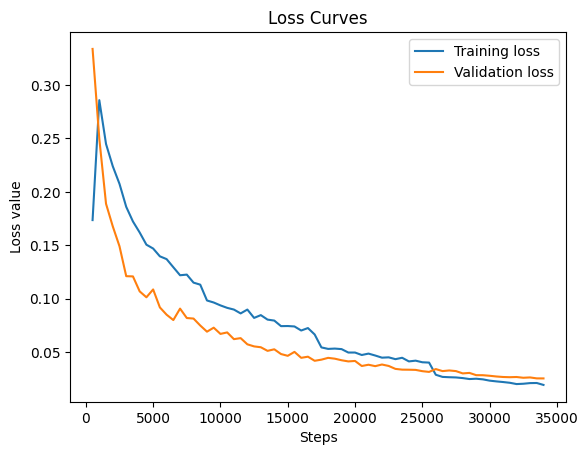

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy dữ liệu training loss và validation loss
train_loss = df["Training Loss"]
val_loss = df["Validation Loss"]

# Vẽ biểu đồ
sns.lineplot(x="Step", y="Training Loss", data=df, label="Training loss")
sns.lineplot(x="Step", y="Validation Loss", data=df, label="Validation loss")

# Thêm tiêu đề và chú thích
plt.title("Loss Curves")
plt.xlabel("Steps")
plt.ylabel("Loss value")
plt.legend()

# Hiển thị biểu đồ
plt.show()
